In [1]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import pandas as pd
import numpy as np

df = pd.read_csv('../base_dados/beber_sem_duplicata.csv', low_memory=False)


                            OLS Regression Results                            
Dep. Variable:                 drk_yn   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     6787.
Date:                Thu, 26 Dec 2024   Prob (F-statistic):               0.00
Time:                        10:43:50   Log-Likelihood:            -2.3258e+05
No. Observations:              401027   AIC:                         4.652e+05
Df Residuals:                  401006   BIC:                         4.654e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

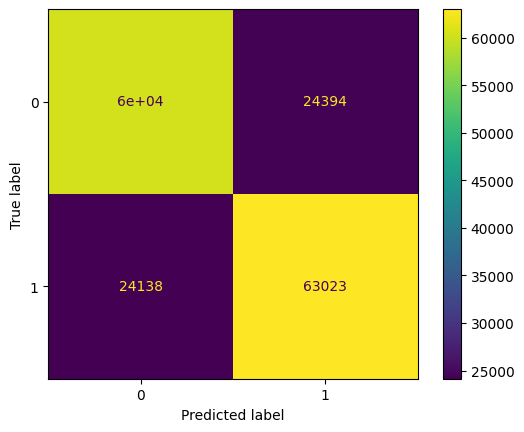

In [2]:


# Definir variáveis independentes (X) e dependente (y)
X = df.drop(columns=['drk_yn'])  # Todas as colunas, exceto a de destino
y = df['drk_yn']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Adicionar constante ao modelo (intercepto)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Ajustar o modelo de regressão linear
modelo = sm.OLS(y_train, X_train).fit()

# Exibir o resumo do modelo
print(modelo.summary())

# Fazer previsões (resultados contínuos)
y_pred = modelo.predict(X_test)

# Converter previsões para classes binárias (0 ou 1) com threshold de 0.5
y_pred_class = np.where(y_pred >= 0.5, 1, 0)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred_class)
print(f'Acurácia: {accuracy:.2f}')

# Relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_class))

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred_class)
print("Matriz de Confusão (Texto):\n", cm)

# Exibir matriz de confusão graficamente
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# cm_df = pd.DataFrame(cm, index=[f'Classe {i}' for i in range(len(cm))], columns=[f'Classe {i}' for i in range(len(cm))])
# cm_df.to_csv('../base_dados/resultados_mineracao_dados/matriz_confusao_regressao_linear_sem_duplicata.csv', index=True)

resultados = pd.DataFrame({
    'Modelo': ['Regressão Linear'],
    'Acurácia': [accuracy]
})

# Salvar o resultado em um arquivo CSV
resultados.to_csv('../base_dados/resultados_mineracao_dados/resultado_regressao_linear_sem_duplicata.csv', index=False)

print("Acurácia salva com sucesso.")